# EasyMoney Customer Segmetation

## 1. Imports

### 1.1. Libraries

In [1]:
import time

from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Working with these versions of libraries\n")
print(f"Sklearn version {sklearn.__version__}")
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")
print(f"Statsmodels version {sm.__version__}")

Working with these versions of libraries

Sklearn version 1.3.0
Numpy version 1.26.4
Pandas version 2.1.4
Statsmodels version 0.14.0


### 1.2. Data

In [3]:
em_segmentation = pd.read_pickle('C:/Users/Usuario/Desktop/Proyects/Easy Money/EasyMoney_/pickles/em_segmentation.pkl')
em_segmentation_trans = pd.read_pickle('C:/Users/Usuario/Desktop/Proyects/Easy Money/EasyMoney_/pickles/em_segmentation_trans.pkl')


In [4]:
em_segmentation.shape

(456172, 18)

In [5]:
em_segmentation_trans.shape

(456172, 31)

### 1.3. Custom Functions

In [6]:
def calc_moda(series):
    return series.mode().iloc[0]

def plot_ts_acf_pacf(y, title):
    '''
    Plots the ts you pass and the acf and pacf.
    '''
    fig = plt.figure(figsize = (12, 10))
    ax1, ax2, ax3 = fig.subplots(3, 1)

    ax1.plot(y)
    plot_acf(x = y, ax = ax2)
    plot_pacf(x = y, ax = ax3, lags= 7)

    plt.suptitle(t = title, fontsize = 20)

## 2. Modelling

#### 2.1. Elbow curve

In [7]:
em_segmentation_trans.drop('ordinal__region_code', axis=1, inplace= True)


In [8]:
em_segmentation_trans.columns

Index(['scaler__entry_channel_nunique', 'scaler__act_cust_most_freq',
       'scaler__act_cust_std', 'scaler__salary', 'scaler__age',
       'scaler__mean_products_contracted', 'scaler__std_products_contracted',
       'scaler__max_products_contracted', 'scaler__min_products_contracted',
       'scaler__T_sales', 'scaler__n_product', 'scaler__T_net_margin',
       'scaler__Mean_net_margin', 'scaler__afiliation_days',
       'encoder__entry_channel_most_freq_KAT',
       'encoder__entry_channel_most_freq_KFA',
       'encoder__entry_channel_most_freq_KFC',
       'encoder__entry_channel_most_freq_KHD',
       'encoder__entry_channel_most_freq_KHE',
       'encoder__entry_channel_most_freq_KHK',
       'encoder__entry_channel_most_freq_KHM',
       'encoder__entry_channel_most_freq_KHN',
       'encoder__entry_channel_most_freq_KHQ',
       'encoder__entry_channel_most_freq_Others',
       'encoder__entry_channel_most_freq_RED', 'encoder__segment_01 - TOP',
       'encoder__segment_02 - 

In [9]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k, random_state = 42)
    clustering_model.fit(em_segmentation_trans)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


Text(0.5, 0.98, 'The variation of cluster dispersion as a function of k')

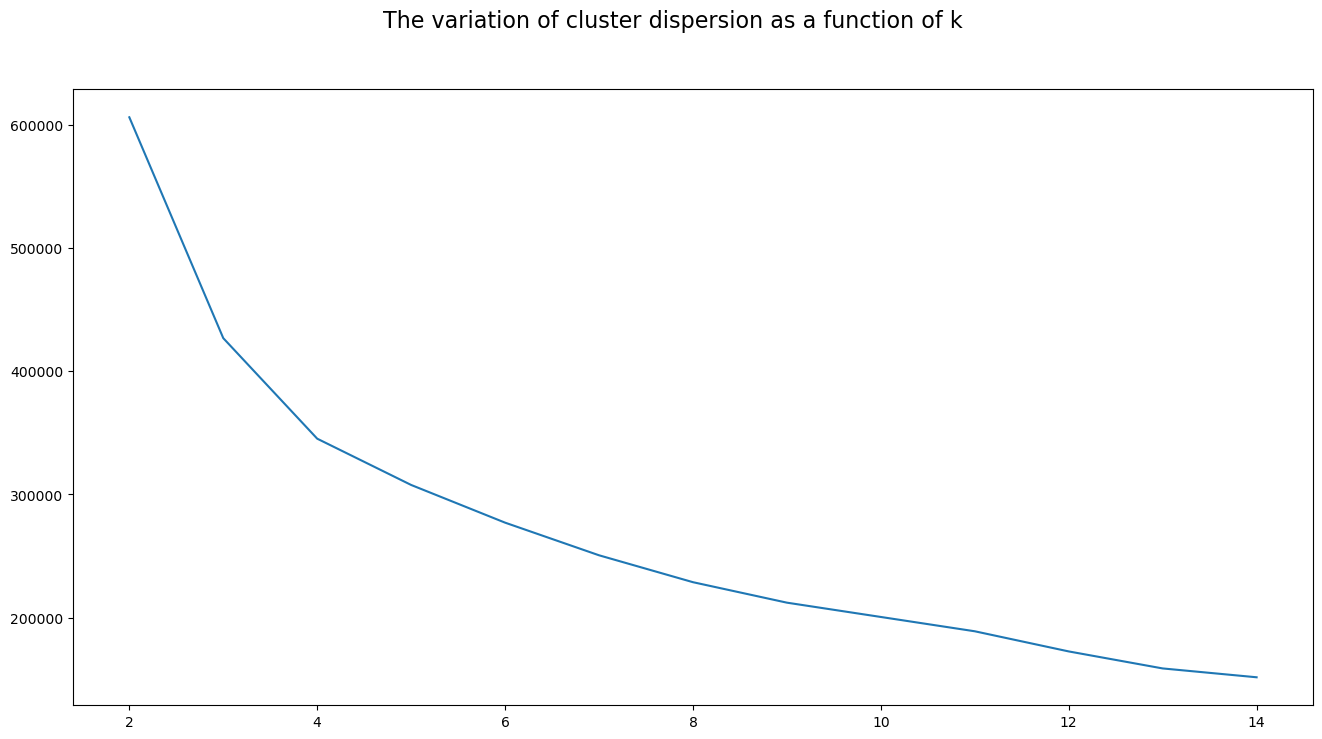

In [10]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/clústers dispersion")
fig.suptitle("The variation of cluster dispersion as a function of k", fontsize = 16)

#### 2.2. Clustering

In [11]:
def clustering(df_train, df_, n_clusters):
  cluster = KMeans(n_clusters, random_state = 42)
  cluster.fit(df_train)
  labels = cluster.predict(df_train)
  df_['cluster'] = labels
  return df_

In [12]:
em_clustered = clustering(em_segmentation_trans, em_segmentation, n_clusters = 4)

em_clustered.head()

,entry_channel_nunique,entry_channel_most_freq,act_cust_most_freq,act_cust_std,salary,age,region_code,segment,customer_seniority,mean_products_contracted,std_products_contracted,max_products_contracted,min_products_contracted,T_sales,n_product,T_net_margin,Mean_net_margin,afiliation_days,cluster
pk_cid,,,,,,,,,,,,,,,,,,,
15891,1,KAT,0.500000,0.707107,176628.780000,59,28.0,02 - PARTICULARES,New,15891.500000,0.707107,15892.0,15891.0,1.0,1.0,66.4,66.40,31,3
16063,1,KAT,0.714286,0.487950,163192.430000,62,28.0,02 - PARTICULARES,New,16063.000000,0.000000,16063.0,16063.0,0.0,0.0,0.0,0.00,181,3
16203,1,KAT,0.833333,0.408248,152281.830000,70,8.0,01 - TOP,New,16203.833333,0.408248,16204.0,16203.0,1.0,1.0,96.7,96.70,151,3
16502,2,KHN,0.888889,0.333333,176423.122222,58,28.0,02 - PARTICULARES,New,16503.444444,0.726483,16504.0,16502.0,2.0,2.0,132.9,66.45,242,3
17457,1,KAT,1.000000,0.000000,102405.750000,54,28.0,02 - PARTICULARES,Old,17459.235294,0.562296,17460.0,17458.0,1.0,1.0,56.0,56.00,607,2


In [13]:
em_clustered['cluster'].value_counts()

cluster
0    202292
2     99068
1     81408
3     73404
Name: count, dtype: int64

In [14]:
cluster = KMeans(5, random_state = 42)
cluster.fit(em_segmentation_trans)
centroids = cluster.cluster_centers_

# Visualizar los valores de los centroides para cada variable
for i, centroid in enumerate(centroids):
    print("Centroide del clúster", i+1)
    for j, value in enumerate(centroid):
        print(f"Variable {j+1}: {value}")
    print("\n")

Centroide del clúster 1
Variable 1: 0.003943170506111843
Variable 2: 0.558925903284344
Variable 3: 0.060726051115707405
Variable 4: 0.0040098333207507835
Variable 5: 0.39705554654539976
Variable 6: 0.7470738557499319
Variable 7: 0.2692181018084409
Variable 8: 0.7470739662521823
Variable 9: 0.7470737323688119
Variable 10: 0.045575804902753536
Variable 11: 0.045575804902753536
Variable 12: 0.02346672050552015
Variable 13: 0.013344947562455668
Variable 14: 0.611647434727094
Variable 15: 0.20560767388110973
Variable 16: 0.03994174941697365
Variable 17: 0.56141109926908
Variable 18: 0.0021105283707780857
Variable 19: 0.09646169918664482
Variable 20: 0.054430526682359315
Variable 21: 0.0026909236727609837
Variable 22: 0.003419055960657537
Variable 23: 0.00010552641843095123
Variable 24: 0.01542796239037883
Variable 25: 0.018393254751324445
Variable 26: 0.03917140656163245
Variable 27: 0.9584014858116003
Variable 28: -2.0972112935169207e-13
Variable 29: 0.0024271076263948192
Variable 30: 0.99

In [15]:
def find_significant_differences(centroids, threshold):
    significant_differences = []
    num_clusters, num_variables = centroids.shape

    for var_index in range(num_variables):
        differences = []
        for cluster_index in range(1, num_clusters):
            difference = centroids[cluster_index][var_index] - centroids[0][var_index]
            differences.append(abs(difference))
        
        max_difference = max(differences)
        if max_difference >= threshold:
            significant_differences.append(var_index)
    
    return significant_differences

threshold = 0.5
significant_vars = find_significant_differences(centroids, threshold)
print("Variables with significant differences between clusters:")
for var_index in significant_vars:
    print(f"Variable {var_index + 1}")

Variables with significant differences between clusters:
Variable 2
Variable 17
Variable 19
Variable 23
Variable 27
Variable 28
Variable 30


In [16]:
important_features_kmeans = em_segmentation_trans.iloc[:,[1,16,18,22,26,27,29]].columns

#### 3.3. Customers analysis

#### 3.3.1. Setting cluster_file

In [17]:
em_clustered.columns.to_list()

['entry_channel_nunique',
 'entry_channel_most_freq',
 'act_cust_most_freq',
 'act_cust_std',
 'salary',
 'age',
 'region_code',
 'segment',
 'customer_seniority',
 'mean_products_contracted',
 'std_products_contracted',
 'max_products_contracted',
 'min_products_contracted',
 'T_sales',
 'n_product',
 'T_net_margin',
 'Mean_net_margin',
 'afiliation_days',
 'cluster']

In [18]:
important_features_kmeans

Index(['scaler__act_cust_most_freq', 'encoder__entry_channel_most_freq_KFC',
       'encoder__entry_channel_most_freq_KHE',
       'encoder__entry_channel_most_freq_KHQ',
       'encoder__segment_02 - PARTICULARES',
       'encoder__segment_03 - UNIVERSITARIO', 'ordinal__customer_seniority'],
      dtype='object')

In [19]:
em_clustered.groupby('cluster').agg(
    average_age = ('age','mean'),
    average_salary = ('salary','mean'),
    average_net_margin = ('T_net_margin','mean'),
    average_sales = ('T_sales','mean'),
    average_afiliation_days = ('afiliation_days','mean'),
    entry_channel = ('entry_channel_most_freq', calc_moda),
    segment = ('segment', calc_moda),
    customer_seniority = ('customer_seniority', calc_moda)

).T

cluster,0,1,2,3
average_age,24.34029,22.448101,42.272469,41.119244
average_salary,114964.527191,118120.920847,117712.647513,114834.556258
average_net_margin,141.129327,177.170652,480.042383,756.582188
average_sales,0.12957,0.862348,0.485303,1.310501
average_afiliation_days,960.826103,235.835864,970.121785,203.794643
entry_channel,KHE,KHQ,KFC,KHM
segment,03 - UNIVERSITARIO,03 - UNIVERSITARIO,02 - PARTICULARES,02 - PARTICULARES
customer_seniority,Old,New,Old,New


In [20]:
#df_file = pd.DataFrame()

#for i, col in enumerate(["age", "salary", "T_net_margin", "T_sales", 'afiliation_days']):
 #   data_summary = em_clustered[["cluster", col]].groupby("cluster").describe().T[1:]
  #  df_file = df_file.append(data_summary)

In [21]:
numeric_desc = []

for col in ["age", "salary", "T_net_margin", "T_sales", 'afiliation_days']:
    data_summary = em_clustered[["cluster", col]].groupby("cluster").describe().T[1:]
    numeric_desc.append(data_summary)

num_file = pd.concat(numeric_desc)

#df_file.reset_index(inplace=True, drop=True)

In [22]:
cat_desc = []

for col in ["entry_channel_most_freq", "segment", "customer_seniority"]:
    data_summary = em_clustered[["cluster", col]].groupby("cluster").describe().T[1:]
    cat_desc.append(data_summary)

cat_file = pd.concat(cat_desc)

In [23]:
cat_file

cluster                                          0                   1  \
entry_channel_most_freq unique                  10                  10   
                        top                    KHE                 KHQ   
                        freq                187439               73612   
segment                 unique                   2                   2   
                        top     03 - UNIVERSITARIO  03 - UNIVERSITARIO   
                        freq                202287               81407   
customer_seniority      unique                   2                   2   
                        top                    Old                 New   
                        freq                202201               81333   

cluster                                         2                  3  
entry_channel_most_freq unique                 11                 11  
                        top                   KFC                KHM  
                        freq                57527              27413  
segment                 unique                  4                  4  
                        top     02 - PARTICULARES  02 - PARTICULARES  
                        freq                90458              60207  
customer_seniority      unique                  2                  2  
                        top                   Old                New  
                        freq                98786              73344

In [24]:
num_file

cluster                          0             1             2             3
age             mean  2.434029e+01  2.244810e+01  4.227247e+01  4.111924e+01
                std   2.810203e+00  2.953139e+00  1.342868e+01  1.381907e+01
                min   2.000000e+01  2.000000e+01  3.000000e+00  2.000000e+00
                25%   2.200000e+01  2.100000e+01  3.400000e+01  3.200000e+01
                50%   2.400000e+01  2.100000e+01  4.000000e+01  3.900000e+01
                75%   2.600000e+01  2.300000e+01  4.900000e+01  4.800000e+01
                max   7.700000e+01  6.600000e+01  1.050000e+02  1.030000e+02
salary          mean  1.149645e+05  1.181209e+05  1.177126e+05  1.148346e+05
                std   1.690278e+05  1.303331e+05  2.162195e+05  1.300014e+05
                min   1.202730e+03  3.731790e+03  3.796860e+03  5.925540e+03
                25%   6.669383e+04  7.923571e+04  6.847910e+04  7.847729e+04
                50%   9.153332e+04  1.004398e+05  9.503067e+04  1.023138e+05
                75%   1.299053e+05  1.552181e+05  1.339790e+05  1.415820e+05
                max   2.425324e+07  2.889440e+07  2.889440e+07  2.167425e+07
T_net_margin    mean  1.411293e+02  1.771707e+02  4.800424e+02  7.565822e+02
                std   9.686265e+02  9.061287e+02  1.673345e+03  1.935721e+03
                min   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
                25%   0.000000e+00  4.400000e+01  0.000000e+00  0.000000e+00
                50%   0.000000e+00  6.650000e+01  0.000000e+00  7.040000e+01
                75%   0.000000e+00  7.610000e+01  5.610000e+01  1.344000e+02
                max   1.728040e+04  1.800680e+04  1.864990e+04  1.807260e+04
T_sales         mean  1.295701e-01  8.623477e-01  4.853030e-01  1.310501e+00
                std   5.532968e-01  7.119368e-01  9.790089e-01  1.395347e+00
                min   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
                25%   0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
                50%   0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00
                75%   0.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00
                max   7.000000e+00  8.000000e+00  8.000000e+00  1.000000e+01
afiliation_days mean  9.608261e+02  2.358359e+02  9.701218e+02  2.037946e+02
                std   3.054260e+02  6.429501e+01  3.211031e+02  1.508342e+02
                min   6.200000e+01  2.800000e+01  0.000000e+00  0.000000e+00
                25%   6.380000e+02  2.120000e+02  6.990000e+02  8.900000e+01
                50%   9.420000e+02  2.420000e+02  9.420000e+02  1.810000e+02
                75%   1.308000e+03  2.730000e+02  1.277000e+03  3.340000e+02
                max   1.581000e+03  1.522000e+03  1.581000e+03  9.120000e+02

In [25]:
#df_file = df_file.groupby(level=0).first().T


Set multiindex

In [26]:
inner_index = [
    "Age",
    "Salary",
    "Net margin",
    "Number of sales",
    'Affiliation days'
]

Statisticals = ["Mean", "St desviation", "Min", "Perc. 25", "Perc. 50", "Perc. 75", "Max"]

new_multi_index = []

for ii, in zip(inner_index):
    for es in Statisticals:
        new_multi_index.append((ii, es))

In [27]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [28]:
names = ["Indicator", "Statistical"]
index_ficha = generate_multiindex(new_multi_index, names)
num_file.set_index(index_ficha, inplace = True)

In [29]:
clusters_size = em_clustered.groupby("cluster").size().to_frame().T
clusters_size.set_index(generate_multiindex([("Cluster", "Size")] , names), inplace = True)

In [30]:
clusters_size

,cluster,0,1,2,3
Indicator,Statistical,,,,
Cluster,Size,202292,81408,99068,73404


In [31]:
num_file.groupby(level=0).first().T

Indicator,Affiliation days,Age,Net margin,Number of sales,Salary
cluster,,,,,
0,960.826103,24.340290,141.129327,0.129570,114964.527191
1,235.835864,22.448101,177.170652,0.862348,118120.920847
2,970.121785,42.272469,480.042383,0.485303,117712.647513
3,203.794643,41.119244,756.582188,1.310501,114834.556258


In [32]:
num_file = pd.concat([num_file, clusters_size])

In [33]:
num_file

cluster                                    0             1             2  \
Indicator        Statistical                                               
Age              Mean           2.434029e+01  2.244810e+01  4.227247e+01   
                 St desviation  2.810203e+00  2.953139e+00  1.342868e+01   
                 Min            2.000000e+01  2.000000e+01  3.000000e+00   
                 Perc. 25       2.200000e+01  2.100000e+01  3.400000e+01   
                 Perc. 50       2.400000e+01  2.100000e+01  4.000000e+01   
                 Perc. 75       2.600000e+01  2.300000e+01  4.900000e+01   
                 Max            7.700000e+01  6.600000e+01  1.050000e+02   
Salary           Mean           1.149645e+05  1.181209e+05  1.177126e+05   
                 St desviation  1.690278e+05  1.303331e+05  2.162195e+05   
                 Min            1.202730e+03  3.731790e+03  3.796860e+03   
                 Perc. 25       6.669383e+04  7.923571e+04  6.847910e+04   
                 Perc. 50       9.153332e+04  1.004398e+05  9.503067e+04   
                 Perc. 75       1.299053e+05  1.552181e+05  1.339790e+05   
                 Max            2.425324e+07  2.889440e+07  2.889440e+07   
Net margin       Mean           1.411293e+02  1.771707e+02  4.800424e+02   
                 St desviation  9.686265e+02  9.061287e+02  1.673345e+03   
                 Min            0.000000e+00  0.000000e+00  0.000000e+00   
                 Perc. 25       0.000000e+00  4.400000e+01  0.000000e+00   
                 Perc. 50       0.000000e+00  6.650000e+01  0.000000e+00   
                 Perc. 75       0.000000e+00  7.610000e+01  5.610000e+01   
                 Max            1.728040e+04  1.800680e+04  1.864990e+04   
Number of sales  Mean           1.295701e-01  8.623477e-01  4.853030e-01   
                 St desviation  5.532968e-01  7.119368e-01  9.790089e-01   
                 Min            0.000000e+00  0.000000e+00  0.000000e+00   
                 Perc. 25       0.000000e+00  1.000000e+00  0.000000e+00   
                 Perc. 50       0.000000e+00  1.000000e+00  0.000000e+00   
                 Perc. 75       0.000000e+00  1.000000e+00  1.000000e+00   
                 Max            7.000000e+00  8.000000e+00  8.000000e+00   
Affiliation days Mean           9.608261e+02  2.358359e+02  9.701218e+02   
                 St desviation  3.054260e+02  6.429501e+01  3.211031e+02   
                 Min            6.200000e+01  2.800000e+01  0.000000e+00   
                 Perc. 25       6.380000e+02  2.120000e+02  6.990000e+02   
                 Perc. 50       9.420000e+02  2.420000e+02  9.420000e+02   
                 Perc. 75       1.308000e+03  2.730000e+02  1.277000e+03   
                 Max            1.581000e+03  1.522000e+03  1.581000e+03   
Cluster          Size           2.022920e+05  8.140800e+04  9.906800e+04   

cluster                                    3  
Indicator        Statistical                  
Age              Mean           4.111924e+01  
                 St desviation  1.381907e+01  
                 Min            2.000000e+00  
                 Perc. 25       3.200000e+01  
                 Perc. 50       3.900000e+01  
                 Perc. 75       4.800000e+01  
                 Max            1.030000e+02  
Salary           Mean           1.148346e+05  
                 St desviation  1.300014e+05  
                 Min            5.925540e+03  
                 Perc. 25       7.847729e+04  
                 Perc. 50       1.023138e+05  
                 Perc. 75       1.415820e+05  
                 Max            2.167425e+07  
Net margin       Mean           7.565822e+02  
                 St desviation  1.935721e+03  
                 Min            0.000000e+00  
                 Perc. 25       0.000000e+00  
                 Perc. 50       7.040000e+01  
                 Perc. 75       1.344000e+02  
                 Max            1.807260e+04  
Number of sales  Mean         

In [34]:
cat_file

cluster                                          0                   1  \
entry_channel_most_freq unique                  10                  10   
                        top                    KHE                 KHQ   
                        freq                187439               73612   
segment                 unique                   2                   2   
                        top     03 - UNIVERSITARIO  03 - UNIVERSITARIO   
                        freq                202287               81407   
customer_seniority      unique                   2                   2   
                        top                    Old                 New   
                        freq                202201               81333   

cluster                                         2                  3  
entry_channel_most_freq unique                 11                 11  
                        top                   KFC                KHM  
                        freq                57527              27413  
segment                 unique                  4                  4  
                        top     02 - PARTICULARES  02 - PARTICULARES  
                        freq                90458              60207  
customer_seniority      unique                  2                  2  
                        top                   Old                New  
                        freq                98786              73344

In [35]:
num_file = num_file.rename(columns = {
    0: "Linked, younger age, lower salary, lower sales, and lower profit",
    1: "Unlinked, younger age, good salary, good sales, and medium profit",
    2: "Linked, older age, good salary, medium sales, and good profit",
    3: "Unlinked, older age, lower salary, higher sales, and higher profit",
})

In [36]:
num_file.style.background_gradient(cmap = 'Blues', axis = 1)

## 3. Pickle & CSV

In [50]:
em_clustered[['act_cust_most_freq', 'act_cust_std', 'salary']] = em_clustered[['act_cust_most_freq', 'act_cust_std', 'salary']].round(2)
em_clustered[['T_net_margin', 'Mean_net_margin']] = em_clustered[['T_net_margin', 'Mean_net_margin']].round(0).astype(int)

In [51]:
pd.to_pickle(em_clustered, 'C:/Users/Usuario/Desktop/Proyects/Easy Money/EasyMoney_/pickles/em_clustered_benchmark')
em_clustered.to_csv('C:/Users/Usuario/Desktop/Proyects/Easy Money/EasyMoney_/CSVs/em_clustered_benchmark.csv')
num_file.to_csv('C:/Users/Usuario/Desktop/Proyects/Easy Money/EasyMoney_/CSVs/cluster_file.csv')